In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

rt_movies_df = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

In [3]:
rt_movies_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
rt_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [5]:
rt_movies_df.shape

(1560, 12)

In [6]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [7]:
rt_reviews_df.shape

(54432, 8)

In [8]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [9]:
rt_reviews_df.dropna()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54419,2000,"Sleek, shallow, but frequently amusing.",2.5/4,fresh,Gene Seymour,1,Newsday,"September 27, 2002"
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002"
54421,2000,"Manages to be somewhat well-acted, not badly a...",1.5/4,rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002"
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"


In [10]:
rt_reviews_df['fresh'].value_counts()

fresh     33035
rotten    21397
Name: fresh, dtype: int64

In [11]:
rt_reviews_df['rating'].value_counts()

3/5      4327
4/5      3672
3/4      3577
2/5      3160
2/4      2712
         ... 
7.9         1
1.6/5       1
8.4         1
9.7         1
6.7         1
Name: rating, Length: 186, dtype: int64

In [12]:
joinedrt = rt_movies_df.set_index('id').join(rt_reviews_df, on = 'id', lsuffix = ' guidelines', rsuffix =' critical')

In [13]:
joinedrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   synopsis           1498 non-null   object
 1   rating guidelines  1557 non-null   object
 2   genre              1552 non-null   object
 3   director           1361 non-null   object
 4   writer             1111 non-null   object
 5   theater_date       1201 non-null   object
 6   dvd_date           1201 non-null   object
 7   currency           340 non-null    object
 8   box_office         340 non-null    object
 9   runtime            1530 non-null   object
 10  studio             494 non-null    object
 11  id                 1560 non-null   int64 
 12  review             1380 non-null   object
 13  rating critical    1157 non-null   object
 14  fresh              1560 non-null   object
 15  critic             1484 non-null   object
 16  top_critic         1560 non-null   int64 


In [14]:
joinedrt.head()

,synopsis,rating guidelines,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,id,review,rating critical,fresh,critic,top_critic,publisher,date
id,,,,,,,,,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"


In [15]:
joinedrt['fresh'].value_counts()

fresh     1073
rotten     487
Name: fresh, dtype: int64

In [16]:
joinedrt['runtime'].value_counts()

90 minutes     72
95 minutes     66
100 minutes    51
93 minutes     47
96 minutes     43
               ..
358 minutes     1
23 minutes      1
184 minutes     1
30 minutes      1
6 minutes       1
Name: runtime, Length: 142, dtype: int64

In [17]:
joinedrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   synopsis           1498 non-null   object
 1   rating guidelines  1557 non-null   object
 2   genre              1552 non-null   object
 3   director           1361 non-null   object
 4   writer             1111 non-null   object
 5   theater_date       1201 non-null   object
 6   dvd_date           1201 non-null   object
 7   currency           340 non-null    object
 8   box_office         340 non-null    object
 9   runtime            1530 non-null   object
 10  studio             494 non-null    object
 11  id                 1560 non-null   int64 
 12  review             1380 non-null   object
 13  rating critical    1157 non-null   object
 14  fresh              1560 non-null   object
 15  critic             1484 non-null   object
 16  top_critic         1560 non-null   int64 


In [19]:
joinedrt = joinedrt.dropna(subset = ['runtime'])

In [20]:
joinedrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 1 to 2000
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   synopsis           1485 non-null   object
 1   rating guidelines  1530 non-null   object
 2   genre              1526 non-null   object
 3   director           1345 non-null   object
 4   writer             1100 non-null   object
 5   theater_date       1194 non-null   object
 6   dvd_date           1194 non-null   object
 7   currency           338 non-null    object
 8   box_office         338 non-null    object
 9   runtime            1530 non-null   object
 10  studio             489 non-null    object
 11  id                 1530 non-null   int64 
 12  review             1352 non-null   object
 13  rating critical    1138 non-null   object
 14  fresh              1530 non-null   object
 15  critic             1455 non-null   object
 16  top_critic         1530 non-null   int64 


In [21]:
joinedrt['freshnum'] = joinedrt['fresh'].map({'fresh': 1, 'rotten': 0})

In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-22-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [23]:
joinedrt['rating critical'].value_counts()

3/4       139
4/5       124
3/5       102
3.5/4     79 
2/5       61 
2/4       61 
2.5/4     56 
3.5/5     40 
B         38 
5/5       38 
4/4       37 
B+        32 
A-        27 
1/5       22 
2.5/5     19 
8/10      19 
B-        18 
4.5/5     18 
1.5/4     16 
A         16 
6/10      13 
C+        13 
9/10      12 
1/4       12 
C         12 
C-        11 
1.5/5     9  
7/10      9  
5/10      9  
0/5       8  
1         6  
8         6  
4/10      4  
7         4  
D+        4  
6         3  
0.5/4     3  
3/10      3  
D         3  
4.0/4     2  
1/10      2  
D-        2  
9         2  
8.5/10    2  
3         2  
A+        2  
8.4/10    2  
0/4       2  
3.7/5     1  
2.0/5     1  
2/10      1  
2         1  
2.5       1  
5         1  
0         1  
0.5/10    1  
7.5/10    1  
3.0/5     1  
5.0/5     1  
2.2/5     1  
7.7       1  
F         1  
Name: rating critical, dtype: int64

In [24]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'3/4' : 75, '4/5' : 80, '3/5' : 60, '1/4': 25, '1/5': 20,'3.5/4' : 87, '2/5': 40, '2/4': 50, '3.7/5': 74})

In [25]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'2.5/4': 63, '3.5/5' : 70, '5/5': 100, 'B': 85, '4/4': 100, 'B+': 88, "A-": 93, '2.5/5' : 50, "8/10" : 80, 'B-': 82, '4.5/5': 90, '1.5/4': 37.5, 'A': 95, '6/10': 60, 'C+': 77, '9/10': 90, "C": 74, 'C-': 72, '5/10': 50, '1.5/5': 30, '7/10': 70})

In [26]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'0/5':0, '8': 80, '1': 10, '4/10': 40, 'D+': 69, '7': 70, '3/10': 30, 'D': 67, "0.5/4": 13, '6': 60}) 

In [27]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({"3": 30, "D-": 66, "1/10": 10, '0/4' : 0, '8.5/10': 85, "A+": 98, '4.0/4': 100, "8.4/10": 84, "9": 90, "F": 35, "7.5/10": 75, "7.7": 77, "2": 20, "0": 0, "2.0/5": 40, '0.5/10': 5}) 

In [28]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'2/10': 20, '5.0/5': 100, '3.0/5': 60, "2.5": 50, '5': 50, '2.2/5': 44})

In [29]:
joinedrt['rating critical'].value_counts()

80.0     149
75.0     140
60.0     119
50.0     91 
87.0     79 
100.0    78 
40.0     66 
63.0     56 
70.0     53 
85.0     40 
88.0     32 
90.0     32 
93.0     27 
20.0     24 
82.0     18 
95.0     16 
37.5     16 
77.0     14 
30.0     14 
74.0     13 
25.0     12 
0.0      11 
72.0     11 
10.0     8  
69.0     4  
67.0     3  
13.0     3  
66.0     2  
98.0     2  
84.0     2  
35.0     1  
44.0     1  
5.0      1  
Name: rating critical, dtype: int64

In [30]:
joinedrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 1 to 2000
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   synopsis           1485 non-null   object 
 1   rating guidelines  1530 non-null   object 
 2   genre              1526 non-null   object 
 3   director           1345 non-null   object 
 4   writer             1100 non-null   object 
 5   theater_date       1194 non-null   object 
 6   dvd_date           1194 non-null   object 
 7   currency           338 non-null    object 
 8   box_office         338 non-null    object 
 9   runtime            1530 non-null   object 
 10  studio             489 non-null    object 
 11  id                 1530 non-null   int64  
 12  review             1352 non-null   object 
 13  rating critical    1138 non-null   float64
 14  fresh              1530 non-null   object 
 15  critic             1455 non-null   object 
 16  top_critic         1530 

<AxesSubplot:xlabel='runtime', ylabel='rating critical'>

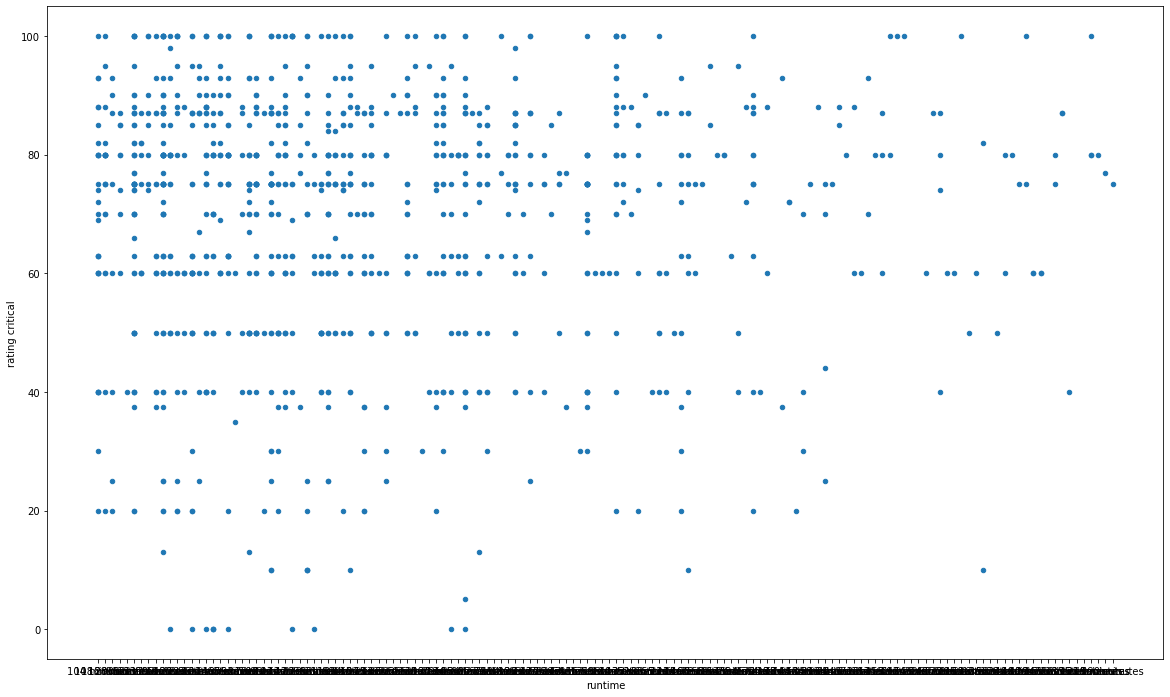

In [34]:
joinedrt.plot('runtime', 'rating critical', kind='scatter', figsize = (20,12))



TypeError: can only concatenate str (not "float") to str

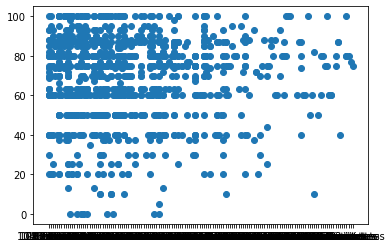

In [32]:
x = joinedrt['runtime']
y = joinedrt['rating critical']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

In [ ]:
joinedrt['runtimecat'] = joinedrt['runtime']

<AxesSubplot:xlabel='freshnum', ylabel='runtime'>

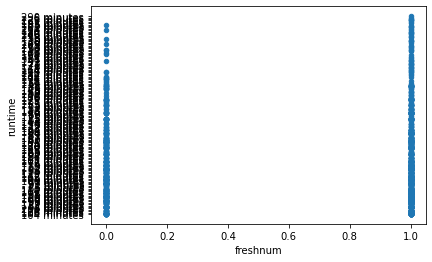

In [60]:
joinedrt.plot('freshnum', 'runtime', kind='scatter')

In [ ]:
runtimevsfreshhist, ax = plt.subplots(figsize=(15, 8))


ax.hist(df['Age'], bins = 80, color = 'blue');

ax.set_xlabel('Age')
ax.set_ylabel('Frquency')
ax.set_title('Histogram of Ages on the Titanic')